# Tutorial 9: Unsupervised Learning Applications (2)

## Objectives

After this tutorial you will be able to:
- Understand the core concepts of GMMs and their ability to model data using mixtures of Gaussian distributions.
- Apply GMMs for anomaly detection in chemical engineering processes, where identifying deviations from normal operating conditions is critical.
- Comprehend the principles of PCA and its role in transforming high-dimensional data into a lower-dimensional space for efficient analysis.
- Understand the strengths and weaknesses of both GMMs and PCA, allowing you to make informed decisions about their suitability for specific tasks in chemical engineering.

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Distribution-Based Clustering: Gaussian Mixture Model (GMM)</a>
    </li>
    <br>
    <li>
        <a href="#2">Principal Component Analysis (PCA)</a>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. Gaussian Mixture Model (GMM)</h2>


### **Overview**
GMMs are a powerful probabilistic approach for modeling data distributions. They essentially represent the data as a mixture of multiple Gaussian distributions (bell curves).

Here's how GMMs work:

1. **Training:**  Train the GMM on a dataset assumed to represent normal operating conditions. The model estimates the parameters (means and variances) of each Gaussian component within the mixture, capturing the different "clusters" within your data.

2. **Anomaly Scoring:** Once trained, calculate an anomaly score for each data point. This score reflects the probability of the data point belonging to the distribution learned by the GMM.

3. **Anomaly Detection:** Points with significantly low scores deviate from the expected patterns and are considered potential anomalies. These anomalies might warrant further investigation.

<div style="text-align: center; margin:2rem;">
    <img src="gmm3.webp">
    <br>
    <small>*source: https://medium.com/@rahulkaliyath/day-11-gaussian-mixture-model-clustering-90e31cdadb12</small>
</div>
<div style="text-align: center; margin:2rem;">
    <img src="gmm2.webp">
    <br>
    <small>*source: https://medium.com/@rahulkaliyath/day-11-gaussian-mixture-model-clustering-90e31cdadb12</small>
</div>
<div style="text-align: center; margin:2rem;">
    <img src="gmm.webp">
    <br>
    <small>*source: https://medium.com/@rahulkaliyath/day-11-gaussian-mixture-model-clustering-90e31cdadb12</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
* **Flexible Model Representation:** GMMs can capture complex data structures by adjusting the number of Gaussian components and their parameters.

* **Intuitive Interpretation:** The Gaussian components provide a visual representation of the underlying data patterns, aiding in anomaly identification and understanding.

* **Effective for Multimodal Data:** GMMs excel at handling data with multiple underlying distributions, making them suitable for scenarios where anomalies deviate from expected clusters.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
* **Choosing the Right Number of Components:** Selecting the optimal number of Gaussian components within the GMM is crucial.  Too few components might underfit the data, missing anomalies, while too many can lead to overfitting.

* **Sensitivity to Initialization:**  The initial guess for the GMM's parameters can influence the learned model. Techniques like k-means clustering can help with initialization, but it's not a foolproof solution.

* **Computational Cost:** Training GMMs can be computationally expensive for very large datasets.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
* **Multimodal Data:** When your data exhibits multiple underlying clusters or patterns, GMMs can effectively capture these variations and identify anomalies that deviate from the expected distributions.

* **Domain Knowledge Available:** If you have some understanding of the "normal" data behavior, it can help guide the selection of the number of Gaussian components within the GMM.

* **Interpretability Preferred:** If interpretability of the model and understanding the underlying data structure are priorities, GMMs offer valuable insights through their visualizable Gaussian components.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example:** Well Property Clustering with GMMs

**Problem Overview:**

We have a dataset containing measurements for 1007 wells.
The goal is to use this data to group the wells into clusters based on similarities in their mechanical properties.

By clustering the wells based on these properties, we can potentially gain insights into the geological formations and their mechanical behavior across different well locations.  

This information can be valuable for wellbore stability analysis, reservoir characterization, and optimizing drilling operations. 

**Objectives:**

- Apply GMMs to partition the well data into distinct clusters.

**Data:**

The dataset consists of information for 1007 wells, with three features for each well:

* **Young's Modulus (GPa):** Numerical value representing the stiffness of the rock formation surrounding the well.
* **Poisson's Ratio:** Numerical value representing the well's tendency to deform under stress.
* **Closure Pressure (MPa):** Numerical value representing the minimum horizontal stress acting on the wellbore.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# import geomechanics data
df = pd.read_csv('Geomechanics.csv')
df.head()

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.78048,4.744385,0.369135
1,10775.65592,4.745286,0.353307
2,11682.04701,4.734561,0.347007
3,10778.93270,4.744971,0.365548
4,9937.88314,4.751685,0.255453


In [3]:
# 1. import necessary modules
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

# 2. preprocess data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# 3. instantiate the model
gmm = GaussianMixture(n_components=3)

# 4. fit the model
gmm.fit(df_scaled)

# 5. predict the clusters
df['cluster'] = gmm.predict(df_scaled)

# visualize the data
fig = px.scatter_3d(df, x='Closure Pressure (psi)', y='YM (MMpsi)', z='PR', color='cluster')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Determining the number of clusters

Using an elbow method similar to K-Means Clustering but calculating the `Bayesian Information Criterion (BIC)` metric instead of the `SSE/WSS/Inertia` metric.

`BIC` helps in choosing the "optimal" model complexity for the data by balancing the **goodness-of-fit** with the model's **complexity (number of parameters/clusters)**.

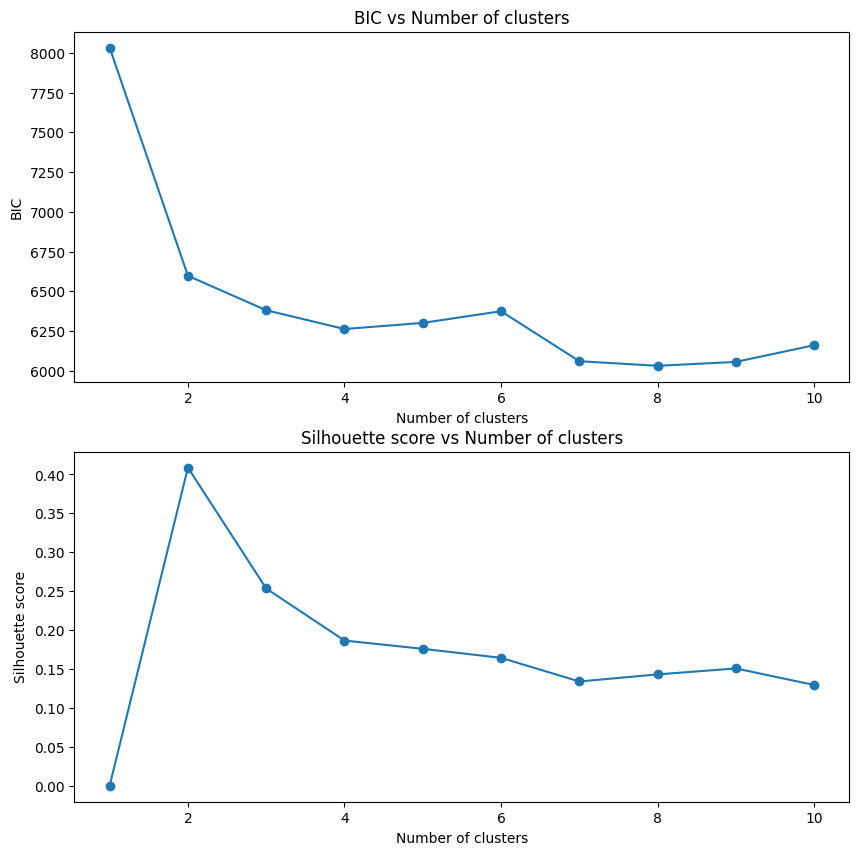

In [4]:
# determine the optimal number of clusters using the BIC elbow method
BICs = []
silhouettes = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(df_scaled)
    BICs.append(gmm.bic(df_scaled))
    if i == 1:
        silhouettes.append(0)
    else:
        silhouettes.append(silhouette_score(df_scaled, gmm.predict(df_scaled)))

# plot the BICs
# subplot 1: BIC
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of clusters')

# subplot 2: silhouette score
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')

plt.show()

In [5]:
# trian the model with the optimal number of clusters
gmm = GaussianMixture(n_components=2)

# fit the model
gmm.fit(df_scaled)

# predict the clusters
df['cluster'] = gmm.predict(df_scaled)


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Anomaly detection using GMMs
Steps:
1. calculate log-liklihood for each sample (datapoint)
2. set perentile threshold (corresponding to required confidence level, we usually start with 99% confidence)
3. detect anomalies with log-liklihood below the threshold


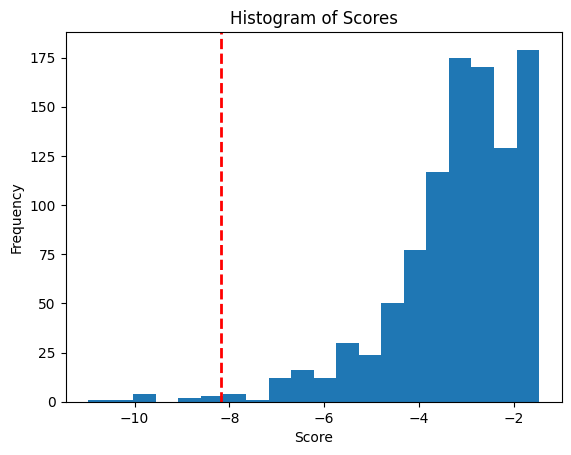

In [6]:
# detect anomalies using GMM
# 1. calculate the score (log probability) of each sample
df['score'] = gmm.score_samples(df_scaled)

# visualize scores using a histogram
plt.hist(df['score'], bins=20)
plt.axvline(np.percentile(df['score'], 1), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [7]:
# 2. set the threshold (we usually start with 1st percentile = 99% confidence level)
threshold = np.percentile(df['score'], 5)

# 3. detect anomalies
df['anomaly'] = df['score'] < threshold

# visualize the data
fig = px.scatter_3d(df, x='Closure Pressure (psi)', y='YM (MMpsi)', z='PR', color='anomaly')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

<hr id="2">
<h2>2. Principal Component Analysis (PCA)</h2>


### **Overview**
PCA is a powerful statistical technique for transforming high-dimensional data into a lower-dimensional space while retaining most of the variance (information) within the data.

Here's how PCA works:

1. **Data Preprocessing:** Ensure your data is clean and scaled appropriately for PCA's effectiveness.

2. **Covariance Matrix:** Calculate the covariance matrix, which captures the linear relationships between features.

3. **Eigenvalue Decomposition:** Decompose the covariance matrix to obtain eigenvectors (principal components) and eigenvalues. Eigenvectors represent the directions of greatest variance in the data, while eigenvalues represent the amount of variance explained by each direction. 

4. **Dimensionality Reduction:** Select the top "n" eigenvectors with the highest eigenvalues, where "n" represents the desired reduced dimensionality. These eigenvectors capture the most significant variations in the data.

5. **Projecting Data:** Project the original data points onto the chosen eigenvectors, effectively transforming them into the lower-dimensional space.

<div style="text-align: center; margin:2rem;">
    <img src="PCA.jpg">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
* **Reduced Computational Cost:** Lower-dimensional data enables faster processing times and reduces storage requirements for complex models.

* **Improved Visualization:** PCA allows for visualizing high-dimensional data by projecting it onto a lower-dimensional space, making it easier to explore relationships between features.

* **Reduced Overfitting:** By eliminating redundant information, PCA can help prevent models from overfitting to the training data and improve their generalizability.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
* **Information Loss:** While PCA aims to retain maximum variance, some information is inevitably lost during dimensionality reduction.

* **Interpretability Challenges:**  Understanding the meaning of principal components can be challenging, especially for datasets with many features.

* **Not Ideal for Non-Linear Relationships:** PCA primarily focuses on capturing linear relationships between features. It might not be the best choice for data with significant non-linear relationships.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
* **High-Dimensional Data:** When dealing with datasets containing a large number of features, PCA can significantly reduce dimensionality while preserving essential information.

* **Visualization Needed:** If visualizing data relationships is crucial for your analysis, PCA can project high-dimensional data onto a lower-dimensional space for easier exploration.

* **Linear Relationships Dominate:** If your data primarily exhibits linear relationships between features, PCA will effectively capture the most significant variations.



<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example:** Developing a soft sensor for a debutanizer column (Dimensionality Reduction)
*Source: [Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering](https://github.com/ML-PSE/Machine_Learning_for_PSE)*

**Problem Overview:**  
The problem at hand involves developing a soft sensor specifically for the debutanizer column within a desulfuring and naphtha splitter plant. The primary objective is to optimize the fractionation process by simultaneously maximizing the content of stabilized gasoline (C5) in the overheads and minimizing the concentration of butane (C4) in the bottoms.

Currently, the measurement of C4 content in the debutanizer bottoms, which serves as the output for the Soft Sensor, is conducted on the overheads of the deisopentanizer column. This measurement point is illustrated in the figure below, with the location of the measuring device indicated by the gray circle named A2. The device gauges the C4 content in the flow to stock, all of which is assumed to originate from the debutanizer bottoms.

The amount of C4 found in iC5 is directly influenced by the debutanizer's operating conditions. Any C4 detected in the iC5 flow is presumed to originate from the debutanizer bottom.

However, due to the analyzer's placement, there is a significant delay in obtaining concentration values. The measuring device operates on a 15-minute cycle, resulting in an estimated delay of about 30 minutes in receiving the data. This means that information about C4 is available with an overall delay of approximately 45 minutes. Given this delay, which is deemed unsuitable for control purposes, the implementation of a soft sensor became necessary.

<div style="text-align: center; margin:2rem;">
    <img src="debutanizer1.png" width="80%">
    <br>
    <small>*source: Fortuna, L., Graziani, S., Rizzo, A., & Xibilia, M. G. (2007). Soft Sensors for Monitoring and Control of Industrial Processes. Springer London.</small>
</div>

**Objectives:**
- Real-time prediction of the butane concentration (C4) in the bottom flow of a debutanizer column, on the basis of a set of available measurements.
- Overcome the delay in obtaining C4 concentration due to the gas chromatograph's location by using soft sensors.
- Ensure that the debutanizer column maintains sufficient fractionation, maximizes C5 content in the overheads (LP gas splitter feed), and minimizes C4 content in the bottoms (Naphtha splitter feed).

**Data:**
- Data is collected from various sensors installed in the plant, including gas chromatographs (A1 and A2), top temperature, pressure, reflux flow, flow to the next process, tray temperatures, and bottom temperatures.
- Data is already cleaned.
- Process parameters:
  - **u1:** Top temperature
  - **u2:** Top pressure
  - **u3:** Reflux flow
  - **u4:** Flow to next process
  - **u5:** 6th tray temperature
  - **u6:** Bottom temperature
  - **u7:** Bottom temperature
  - **y:** C4 concentration

<div style="text-align: center; margin:2rem;">
    <img src="debutanizer2.png" width="80%">
    <br>
    <small>*source: Fortuna, L., Graziani, S., Rizzo, A., & Xibilia, M. G. (2007). Soft Sensors for Monitoring and Control of Industrial Processes. Springer London.</small>
</div>

In [8]:
# import fracability dataset
df = pd.read_csv('debutanizer_data.csv')
df.head()


,u1,u2,u3,u4,u5,u6,u7,y
0,0.269,0.651,0.833,0.583,0.785,0.843,0.822,0.180
1,0.268,0.650,0.852,0.578,0.776,0.839,0.822,0.177
2,0.268,0.660,0.824,0.572,0.765,0.808,0.786,0.174
3,0.267,0.668,0.808,0.566,0.753,0.800,0.786,0.172
4,0.267,0.647,0.762,0.560,0.745,0.773,0.746,0.167


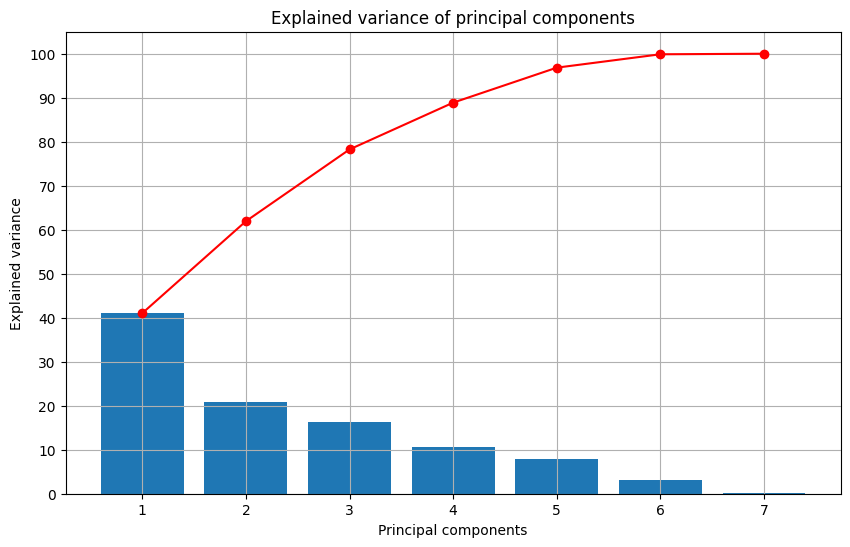

In [11]:
from sklearn.decomposition import PCA

# calculate principal components and plot explained variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

X = df.drop('y', axis=1)
pipe.fit(X)

# explained variance %
explained_variance = pipe.named_steps['pca'].explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

# plot the explained variance % as bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.title('Explained variance of principal components')
plt.show()

<hr style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

## **Exercise:** Anomaly Detection in Semiconductor Manufacturing
*Source: [Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering](https://github.com/ML-PSE/Machine_Learning_for_PSE)*

**Problem Overview:**
A semiconductor etching process is crucial for chip production, and maintaining consistent operation is essential. Anomalies in this process can lead to faulty batches. We have historical data from both normal and faulty batches, but the data exhibits high dimensionality (19 process variables).

**Objective:**

- Analyze the process data to determine if it exhibits multimodality using GMMs. Multimodality refers to the presence of distinct operational modes within the data. 
- Once the GMM model is trained, use the model for anomaly detection using the anomaly scores of datapoints.

**Data:**

The dataset consists of measurements from a semiconductor etching process, including:

* **Process Variables:** 19 measurements taken throughout the etching process for each batch.
* **Batch Labels:** Labels indicating normal (108 batches) or faulty (21 batches) batches.

By understanding if the data exhibits multimodality, we can potentially develop a more effective model to distinguish normal and faulty batches in the future. This will be crucial for improving process monitoring and ensuring consistent chip quality. 


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 1: load normal operation data

In [12]:
# load normal data
data = np.loadtxt('metal_etch_train.csv', delimiter=',')

# create dataframe
df = pd.DataFrame(data)

# TODO: print the shape of the dataframe
df.shape


(107, 1615)

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 2: perform dimensionality reduction and visualize PCs

In [13]:
# import the necessary modules for the selected model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# TODO: create and fit a pipeline for scaling and dimensionality reduction using PCA (use 3 components)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 3))
])
data_pca = pipe.fit_transform(df)

# TODO: create a dataframe from the fitted data and add a class colum =0
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['class'] = 0

# TODO: visualize the data
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 3: load faulty data, process, and visualize

In [14]:
# load faulty data
data_test = np.loadtxt('metal_etch_test.csv', delimiter=',')

# TODO: scale and PCA on faulty test data and assign a class =1
data_pca_test = pipe.transform(data_test)
df_pca_test = pd.DataFrame(data_pca_test, columns=['PC1', 'PC2', 'PC3'])
df_pca_test['class'] = 1

# TODO: combine the normal and faulty data into one dataframe
df_pca_combined = pd.concat([df_pca, df_pca_test])

# TODO: visualize the data
fig = px.scatter_3d(df_pca_combined, x='PC1', y='PC2', z='PC3', color='class')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 4: build and train a GMM for anomaly detection

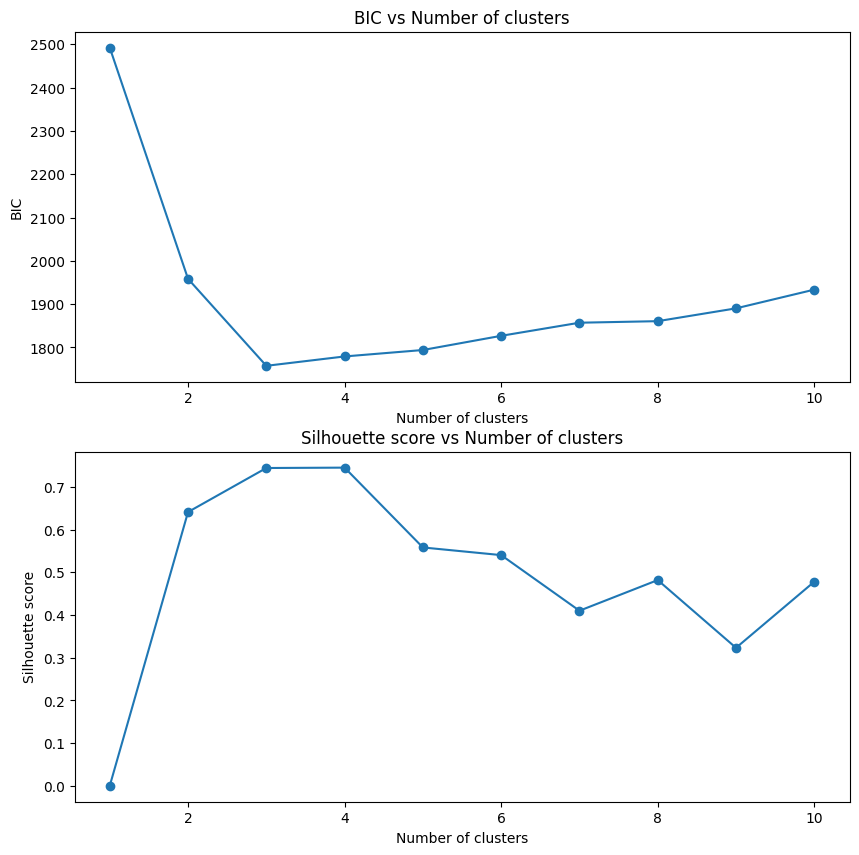

In [15]:
# TODO: determine the optimal number of clusters using the BIC elbow method for GMM
# train the model using only normal conditions data 
BICs = []
silhouettes = [0]
X = df_pca.drop('class', axis=1)
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    BICs.append(gmm.bic(X))
    if i > 1:
        silhouettes.append(silhouette_score(X, gmm.predict(X)))

# plot the BICs
# subplot 1: BIC
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of clusters')

# subplot 2: silhouette score
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')

plt.show()

In [16]:
# TODO: build the GMM model with the optimum number of components
gmm = GaussianMixture(n_components=3, random_state=42)

# TODO: train the model using only the normal data
X = df_pca.drop('class', axis=1)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 5: anomaly detection using the trained GMM

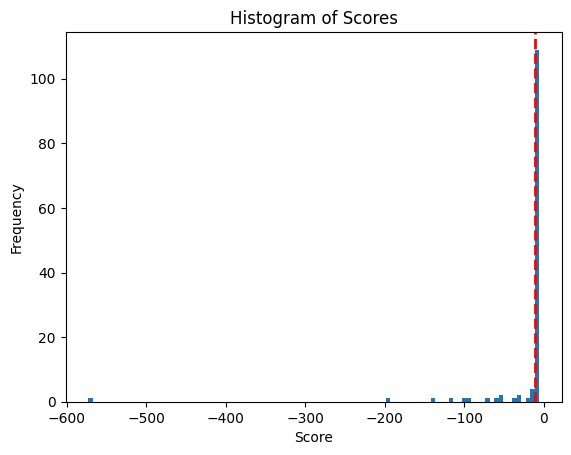

In [17]:
# TODO: 1. calculate the anomaly scores for the combined data
df_pca_combined['score'] = gmm.score_samples(df_pca_combined[['PC1', 'PC2', 'PC3']])

# TODO: visualize the scores using a histogram
plt.hist(df_pca_combined['score'], bins=100)
plt.axvline(np.percentile(df_pca_combined['score'], 15), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [18]:
# TODO: 2. set threshold
threshold = np.percentile(df_pca_combined['score'], 15)

# TODO: 3. predict anomalies
df_pca_combined['anomaly'] = df_pca_combined['score'] < threshold

# TODO: visualize the data
fig = px.scatter_3d(df_pca_combined, x='PC1', y='PC2', z='PC3', color='anomaly')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

# TODO: print classification report
from sklearn.metrics import classification_report


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### Step 6: visualizing model's accuracy `(BONUS!)`

In [19]:
# TODO: initialize a column for the confusion matrix with default value = True Negative (TN)
df_pca_combined['confusion'] = 'TN'

# TODO: update the confusion matrix values based on the actual and predicted classes (True Positive, False Positive, True Negative, False Negative)
df_pca_combined['confusion'][(df_pca_combined['class'] == 0) & (df_pca_combined['anomaly'] == False)] = 'TN'
df_pca_combined['confusion'][(df_pca_combined['class'] == 0) & (df_pca_combined['anomaly'] == True)] = 'FP'
df_pca_combined['confusion'][(df_pca_combined['class'] == 1) & (df_pca_combined['anomaly'] == False)] = 'FN'
df_pca_combined['confusion'][(df_pca_combined['class'] == 1) & (df_pca_combined['anomaly'] == True)] = 'TP'

# TODO: visualize the confusion matrix
fig = px.scatter_3d(df_pca_combined, x='PC1', y='PC2', z='PC3', color='confusion')
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

C:\Users\chesa\AppData\Local\Temp\ipykernel_23576\3111846618.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chesa\AppData\Local\Temp\ipykernel_23576\3111846618.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chesa\AppData\Local\Temp\ipykernel_23576\3111846618.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chesa\AppData\Local\Temp\ipykernel_23576\3111846618.py:8: SettingWithCopyWarning:


A value

<hr style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

## EXTRA: Visualization of GMM distributions

### Helper functions

In [54]:
# define a function to plot a gaussian distribution given the mean and standard dev
def plot_gaussian(x, clusters, cluster_centers, cluster_covariances):
    x_min = np.min(x) - 1
    x_max = np.max(x) + 1
    xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    y = []

    # calculate the gaussian distribution
    for i in range(len(cluster_centers)):
        mean = cluster_centers[i]
        std = np.sqrt(cluster_covariances[i, 0, 0])
        y.append((1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xx - mean) / std) ** 2))

    # plot the gaussian distribution and scatter plot of the data
    plt.figure(figsize=(10, 5))
    plt.scatter(x, np.zeros(len(x)), c=clusters)
    plt.plot(xx, y[0], color='purple', linewidth=2)
    plt.plot(xx, y[1], color='yellow', linewidth=2)
    plt.plot(xx, y[0] + y[1], color='red', linewidth=2)
    plt.show()


# define a function to plot 3D gaussian distribution of 2 parameters given the cluster centers and covariances
def plot_gaussian_3d(df, x, y, cluster_centers, cluster_covariances):
    # create a grid
    x_min, x_max = df[x].min() - 1, df[x].max() + 1
    y_min, y_max = df[y].min() - 1, df[y].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.zeros(xx.shape)

    # calculate the gaussian distribution
    for i in range(len(cluster_centers)):
        mean = cluster_centers[i]
        cov = cluster_covariances[i]
        Z += np.exp(-0.5 * (np.square(xx - mean[0]) + np.square(yy - mean[1])) / cov[0, 0])

    # plot the gaussian distribution
    fig = go.Figure()
    fig.update_layout(width=1000, height=1000)
    fig.add_trace(go.Scatter3d(x=df[x], y=df[y], z=np.zeros(len(df)), mode='markers', marker=dict(size=5, color=df['cluster'])))
    fig.add_traces(go.Surface(x=xx, y=yy, z=Z, showscale=False, opacity=0.5))
    fig.show()

    # plot scatter and contour plot
    plt.figure(figsize=(10, 5))
    plt.scatter(df[x], df[y], c=df['cluster'])
    plt.contour(xx, yy, Z, levels=10, alpha=0.5)
    plt.colorbar(cmap='viridis')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Gaussian distribution of ' + x + ' and ' + y)
    plt.show()

### Example #1: 1D Gaussian Distribution

In [42]:
x = [1, 2, 2, 3, 4, 5, 5, 6, 7]
x = np.array(x).reshape(-1, 1)

# train a GMM model with 2 components
gmm = GaussianMixture(n_components=2)

# fit the model
gmm.fit(x)

# predict the clusters
clusters = gmm.predict(x)

# get the cluster centers and covariances
cluster_centers = gmm.means_
cluster_covariances = gmm.covariances_

# print cluster centers
# print(cluster_centers)
print(cluster_covariances)

[[[0.52165649]]

 [[1.25217999]]]


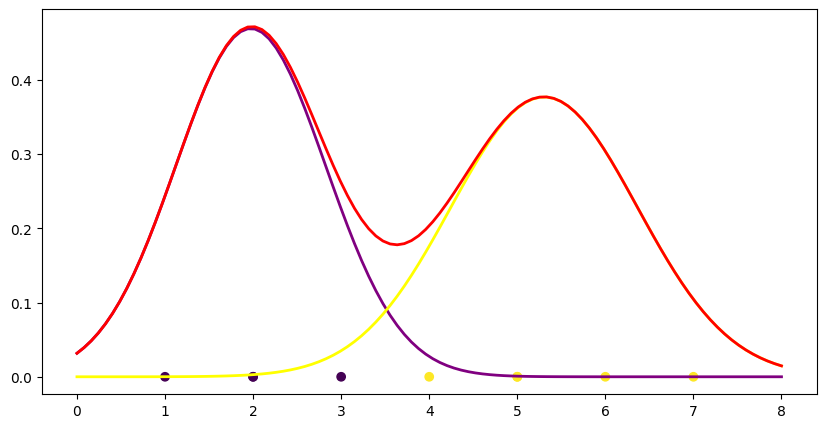

In [55]:
# plot the gaussian distribution and a scatter plot of the data
plot_gaussian(x, clusters, cluster_centers, np.sqrt(cluster_covariances))

### Example #2: 2D Gaussian Distribution

In [23]:
# import geomechanics data
df = pd.read_csv('Geomechanics.csv')
df.drop('PR', axis=1, inplace=True)

df.head()

,Closure Pressure (psi),YM (MMpsi)
0,11421.78048,4.744385
1,10775.65592,4.745286
2,11682.04701,4.734561
3,10778.93270,4.744971
4,9937.88314,4.751685


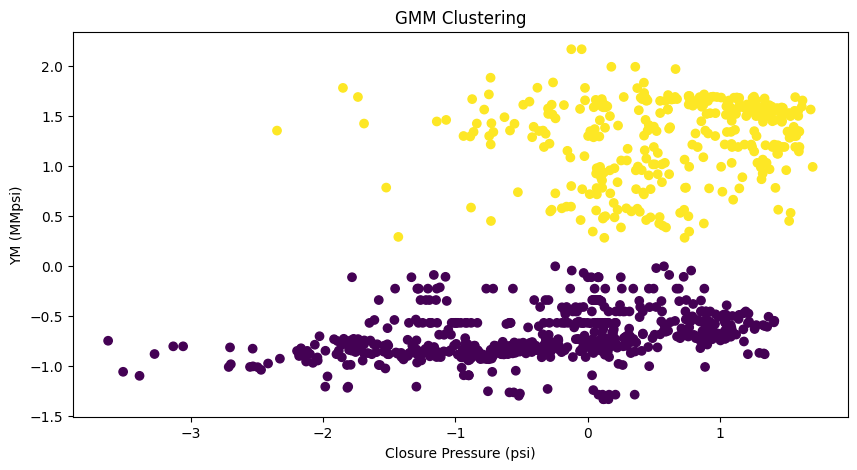

In [24]:
# 1. import necessary modules
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

# 2. preprocess data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# 3. instantiate the model
gmm = GaussianMixture(n_components=2)

# 4. fit the model
gmm.fit(df_scaled)

# 5. predict the clusters
df_scaled['cluster'] = gmm.predict(df_scaled)

# visualize the data
plt.figure(figsize=(10, 5))
plt.scatter(df_scaled['Closure Pressure (psi)'], df_scaled['YM (MMpsi)'], c=df_scaled['cluster'], cmap='viridis')
plt.xlabel('Closure Pressure (psi)')
plt.ylabel('YM (MMpsi)')
plt.title('GMM Clustering')
plt.show()

In [25]:
# print means and covariances
means = gmm.means_
covariances = gmm.covariances_

print('Means:', means)
print('Covariances:', covariances)

Means: [[-0.34144611 -0.70325888]
 [ 0.62682789  1.29104498]]
Covariances: [[[0.92441208 0.07814876]
  [0.07814876 0.05341883]]

 [[0.53182624 0.04171972]
  [0.04171972 0.16300372]]]


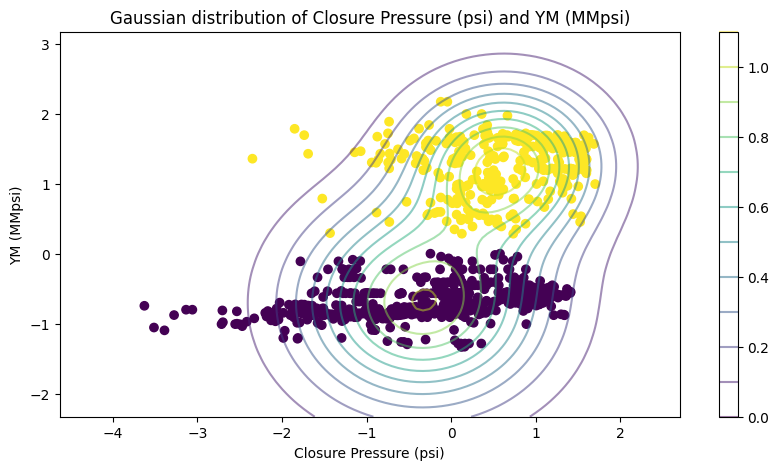

In [26]:
# plot the gaussian distribution
plot_gaussian_3d(df_scaled, 'Closure Pressure (psi)', 'YM (MMpsi)', means, covariances)

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

- Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python
- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering
- https://github.com/ML-PSE/Machine_Learning_for_PSE